## 主题模型
- 概念：是用来在一系列文档中发现**抽象主题**的一种统计模型。主管来讲，如果一篇文章又一个中心思想，那么一定存在一些特定词语会出现的比较频繁。主题模型是一种自动分析每个文档，统计文档内的词语，根据统计的信息判断包含那些主题以及各个主题所占比例是多少。 
- 主题模型是对文本隐含主题的一种建模方法，每个主题实质上就是词表上单词的概率分布。
- 主题模型是一种生成模型，一篇文章中的每个词是通过“以一定的概率选择某个主题，并从这个主题中以一定概率选择某个词”所得到：
$$P(word|doc) = \sum_{topic} p(topic|doc) * p(word|topic)$$
- 主题模型克服了传统信息检索中文档相似度计算方法的缺点，并能在海量文本中找到文字间的语义主题。

## LSA（潜在语义分析）
- LSA基于奇异值分解（SVD）的方法得到的主题模型
- 输入 m 个文本，每个文本 n 个词。$A_{ij}$表示第第 i 个文本第 j 个词的特征值。k 是假设的主题数。SVD分解后 $U_{il}$表示第 i 个文本和第 l 个主题的相关度。$V_{jm}$ 表示第 j 个词和第 m 个词义的相关度$\sum_{lm}$表示第 l 个主题和第 m 个词义的相关度。
- 总结：
    1. 适用主题规模小的数据
    2. 原理简单一次分解即可得到模型，可以同时解决词义的问题
    3. SVD分解计算非常耗时，很难寻找到合适的k值。LSA不是概率模型，缺乏概率统计。 

## pLSA（概率LSA模型）：
为了解决LSA无法得出届时概率的问题

## LDA
### 相关概念
1. 先验分布：统计实验之前根据其他参数知识得到的分布，先验分布函数和先验概率函数统称为先验分布；
2. 后验分布：根据样本的分布及先验分布，使用概率论中求解条件概率的方式计算出已知样本的条件下，参数的分布；
3. 共轭分布：如果先验分布和后验分布具有相同的形式，那么先验分布和似然函数被称为共轭分布；
4. 二项分布：二项分布有伯努利分布推导而来，伯努利分布又称亮点分布，其随机变量只有两个取值（+，-）。而二项分布就是重复 n 次伯努利实验。记为：$X~b(n,p)$，二项分布的概率密度函数：
$$p(K=k) = \binom{n}{k} p^k (1-p)^{n-k},\  \binom{n}{k}= \frac{n!}{k!(n-k)!}$$
$$E(x)=np$$
$$D(x)=np(1-p)$$
5. 多项分布：其取值包含多种离散值，概率密度函数为：(其含义为事件x1发生的次数为m1次，xk发生的次数为mk,事件总次数为n 次，p1,p2...的概率是多少)
$$X=(x_1, x_2,...,x_k) \;\; \sum_{i=1}^k m_i = n$$
$$p(x_1=m_1,x_2=m_2,...,x_k=m_k,n,p_1, p_2,...,p_k)=\frac{n!}{m_1! m_2!...m_k!}p_1^{m_1}p_2^{m_2}...p_k^{m_k}$$
6. Beta分布：是二项分布的共轭分布，是指定义在（0，1）区间的连续概率分布，具有两个参数：$\alpha,\beta>0$;
$$f(x)=\frac{1}{B(\alpha, \beta)}x^{\alpha-1}(1-x)^{\beta-1}, x\in(0,1]$$
$$B(\alpha, \beta)=\frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha+\beta)}$$
$$\Gamma(n) = (n-1)!,\;\;\;\;\;E(x)=\frac{\alpha}{\alpha+\beta}$$
7. Dirichlet分布：由beta分布推广而来，是多项式的共轭分布
$$f(x_1,x_2,...,x_k,\alpha_1,\alpha_2,...,\alpha_k)=\frac{1}{b(\alpha)}\prod_{i=1}^k x_i^{\alpha_i-1}$$
数学期望：$$E(x_i)=\frac{\alpha_i}{\sum_{j=1}^k\alpha_j}$$

### LDA 隐含狄利克雷模型
- 是一种基于贝叶斯算法模型，利用先验分布对数据进行似然估计最终得到后验分布的一种方式。
- LDA假设文档主题是多项分布，多项分布的参数（先验分布）是服从Dirichlet分布，LDA是一种三层的贝叶斯模型。
- LDA
    1. 共有M篇文档，每个文档有$N_M$个单词，一共涉及到K个主题
    2. 每篇文章都有各自的主题，主题分布是多项式分布，该多项式分布的参数服从Dirichlet分布，该Dirichlet分布的参数为$\alpha$
    3. 每个主题都有各自的词分布，词分布是多项式分布，该多项式分布的参数服从Dirichlet分布，该Dirichlet分布的参数为$\eta$
    4. 对于某篇文档 d 中的第 n 个单词，首先从该文档的主题文档中采用一个主题，然后在这个主题的词分布中采用一个词，不断重复该操作，直到m 篇文档全部完成上述操作。
- 详细解释： 
    1. 词汇表中有 V 个term（不可重复）
    2. 语料库中共有m 篇文档$d_1, d_2, ..., d_m$;对于文档$d_i$是有 $N_i$个word 组成，预料库共有 K 个主题$T_1, T_2, ..., T_k$
    3. $\alpha 和 \eta $是先验分布（Dirichlet）的参数
    4. $\theta$是每篇文档的主题分布，是个k 维向量
    5. 对于第 i 篇文档$d_i$，在主题$T_i$下，可以确定一个具体的主题$z_{ij}=K$
    6. $\beta$是没个主题的词分布，是一个v维向量
    7. 由 $z_{ij}$选择$\beta_{z_{ij}}$，表示由词分布$\beta_{z_{ij}}$确定term，即可得到最终的观测值$w_{ij}$
- 模型构建流程：
    1. 对于每个主题，计算出$\beta$的值
    2. 对于每篇文档，计算出$\theta$的值
    3. 对于 文档中的word:
        - 计算所属主题的 z 值
        - 计算出观测到的单词 w
- 基于贝叶斯算法可得到如下公式：
$$p(z,\theta,\beta|w,\alpha,\eta)=\frac{p(z,\theta,\beta,w|\alpha,\eta)}{p(w|\alpha,\eta)}$$

In [1]:
# Beta分布的代码
from scipy.special import gamma
class Beta:
    def __init__(self, alpha=1, beta=1):
        self.alpha = alpha
        self.beta = beta
        
    def B(self):
        return (gamma(self.alpha) * gamma(self.beta))/gamma(self.alpha + self.beta)
    
    def result(self, x):
        return (1 / self.B()) * x ** (self.alpha - 1) * (1 - x) ** (self.beta - 1)

In [18]:
beta = Beta(1, 5)
beta.result(0.2)

2.0480000000000005

In [2]:
# 画图
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Heiti']
plt.rcParams['axes.unicode_minus'] = False

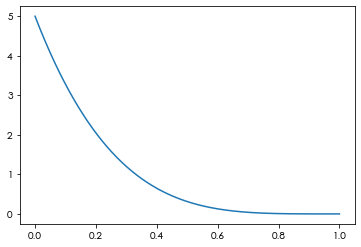

In [19]:
x = np.linspace(1e-10, 1, 10000)
y = beta.result(x)

plt.figure(facecolor='w')
# for i, (alpha, beta) in enumerate(a):
#     y = Beta(alpha, beta).result(x)
plt.plot(x, y)
plt.show()

In [2]:
# 代码实现坐标轴下降法

0.648

In [5]:
for i,j,k in enumerate(a):
    print(i,j,k)

ValueError: not enough values to unpack (expected 3, got 2)